In [2]:
import numpy as np
from numba import jit, guvectorize, vectorize, int64,float64,complex64
from matplotlib import pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def cRound(z,deg = 5):
    if z.real < 10**-10:
        z = complex(0,1)*z.imag
    if z.imag < 10**-10:
        z = z.real
    return round(z.real,deg)+complex(0,1)*round(z.imag,deg)

dstack_product = lambda arrays: np.dstack(np.meshgrid(*arrays, indexing='ij')).reshape(-1, len(arrays))

In [4]:
@guvectorize([(complex64[:,:],float64,float64,float64,complex64[:,:])], '(a,b),(),(),()->(a,b)')
def model1(cond,dt,a,d,res):
    res[0]=cond[0]
    for i in range(1,res.shape[0]):
        x,y = res[i-1]
        dy = (a*x-a/32*x*y)*dt
        dx = (d/5.6*x*y-d*y)*dt
        res[i] = np.array([x+dx,y+dy])

In [5]:

cond = np.array([[,]]*1000000,dtype=np.complex64)
dt = 0.0001
a,d=1,1
t=time()
dat = model1(cond,dt,a,d,cond)
plt.scatter(dat[:, 0], dat[:, 1])
plt.show()
print(round(time()-t,10))

SyntaxError: invalid syntax (<ipython-input-5-4e7eac7bd174>, line 2)

In [6]:
t = np.arange(32)
#5,15,5,10,50,70,20,25,50,
#2,3,5,14,27,47,29,2,4,
x = np.array([55,75,70,30,20,15,15,20,35,60,80,85,60,30,20,10, 5, 5,10], dtype=np.float64)
y = np.array([10,14,19, 8, 9, 2, 1, 1, 2, 4, 4, 8, 7, 9, 7, 4, 3, 2, 3], dtype=np.float64)

In [7]:
def f(x,y,a,d):
    return (x**a)*(y**d)*np.exp(-a/32*x-d/5.6*y)

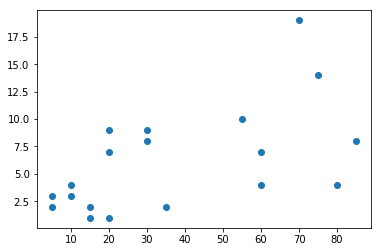

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
@jit
def calcA(a,d):
    A = 0
    for i in range(x.shape[0]):
        A +=f(x[i],y[i],a,d)
    return A/x.shape[0]

a,d = np.arange(0.1,2.1,.1),np.arange(0.1,2.1,.1)
c = d/5.6
b = a/32
vals = dstack_product([a,d])

dat2 = []
for i in vals:
    dat2.append(calcA(*i))
dat2 = np.array(dat2)

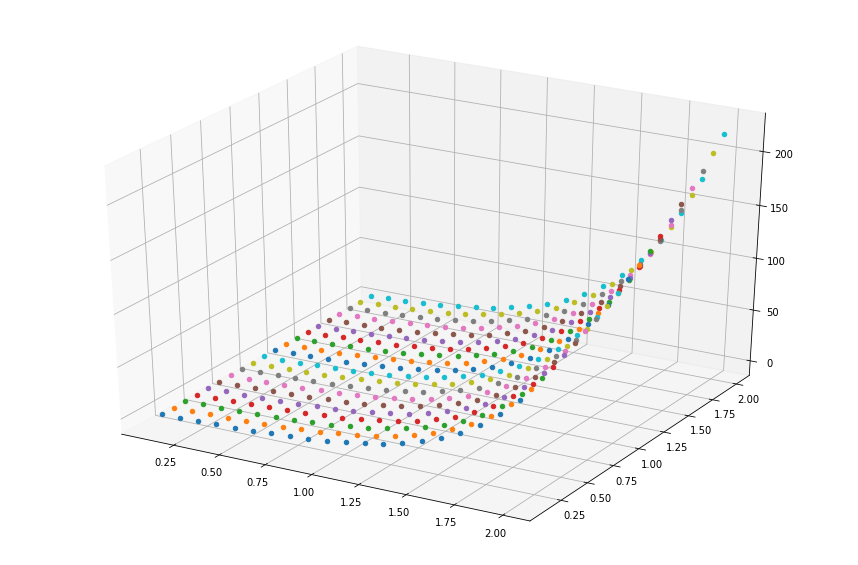

34.292128068534815


In [10]:
fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')

for i in range(len(vals)):
    ax.scatter(*vals[i],dat2[i])

plt.show()
print(sum(dat2)/len(dat2))

In [11]:
def error(A,a,d):
    err = 0
    for i in range(x.shape[0]):
        err += (A-f(x[i],y[i],a,d))**2
    return err

In [46]:
for i in range(400):
    e = error(dat2[i],vals[i,0], vals[i,1])
    print(e)

0.0602468933358
0.16895715423
0.361984924246
0.651236705369
1.05074863547
1.57700046532
2.24927881172
3.09009699189
4.12567984785
5.3865232368
6.90803931845
8.73130044146
10.9038963502
13.4809216372
16.5261128976
20.113157951
24.3272028321
29.2665860908
35.0448343444
41.7929580845
0.215512806837
0.392876300294
0.701719518722
1.16063828967
1.79153855155
2.62012451584
3.67646332758
4.99563756622
6.61849864102
8.59253610201
10.9728801458
13.8234571885
17.2183213576
21.243188173
25.9972006192
31.5949623199
38.1688777121
45.8718450649
54.8803550298
65.3980552564
0.636768064898
0.938008711879
1.4458480157
2.18952538233
3.20345145034
4.52797057255
6.21024253544
8.30526119057
10.8770303388
13.9999202706
17.7602318811
22.257999319
27.6090667612
33.9474802376
41.428241541
50.2304782858
60.5610922491
72.6589573909
86.7997495972
103.301502412
1.61458343106
2.14006321093
2.99238995429
4.21781516809
5.87070702526
8.0147463905
10.7243094008
14.0860642383
18.2008138986
23.1856215417
29.1762605049
36.3

In [15]:
vals[1]

array([0.1, 0.2])